In [3]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import MDBN

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5005)


In [4]:
reload(MDBN)
rna_DBN, ge_DBN, me_DBN, top_DBN =MDBN.load_network('Exp_2016-11-10_1536_run_0.npz','../MDBN_run/Run_2016-11-10_1536')

Adding a layer with 799 input and 40 outputs
Adding a layer with 16046 input and 400 outputs
Adding a layer with 400 input and 40 outputs
Adding a layer with 15418 input and 400 outputs
Adding a layer with 400 input and 40 outputs
Adding a layer with 120 input and 24 outputs
Adding a layer with 24 input and 3 outputs


In [5]:
datafiles = MDBN.prepare_TCGA_datafiles('../data')

In [6]:
RNA_output, _ = MDBN.output_DBN(rna_DBN, datafiles['mRNA'], datadir='../data')
GE_output, _ = MDBN.output_DBN(ge_DBN, datafiles['GE'], datadir='../data')
ME_output, _ = MDBN.output_DBN(me_DBN, datafiles['ME'], datadir='../data')

(-0.5, 119.5, 384.5, -0.5)

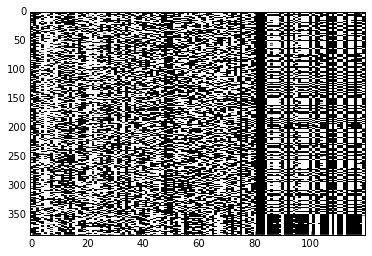

In [12]:
joint_layer = np.concatenate([RNA_output, GE_output, ME_output],axis=1)
plt.imshow(joint_layer, cmap='gray',interpolation='none')
plt.axis('tight')

([<matplotlib.axis.XTick at 0x123b9d4d0>,
 <a list of 3 Text xticklabel objects>)

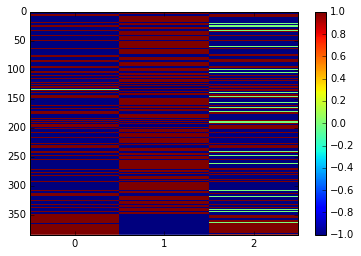

In [30]:
top_output = top_DBN.get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x123eab110>,
 <a list of 3 Text xticklabel objects>)

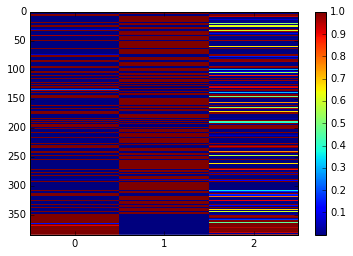

In [34]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0])
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 244.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,  139.]),
  array([ 147.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,  237.]),
  array([ 219.,   14.,    0.,    7.,    3.,    7.,   12.,    6.,    4.,  113.])],
 array([  6.62467414e-10,   1.00000001e-01,   2.00000001e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

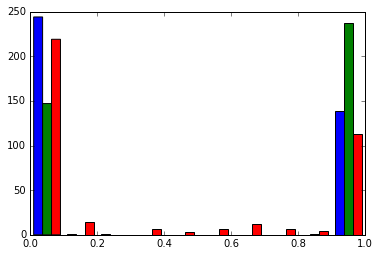

In [103]:
plt.hist(top_output)

(array([ 244.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,  139.]),
 array([  4.25631397e-09,   9.99999323e-02,   1.99999860e-01,
          2.99999788e-01,   3.99999716e-01,   4.99999645e-01,
          5.99999573e-01,   6.99999501e-01,   7.99999429e-01,
          8.99999357e-01,   9.99999285e-01]),
 <a list of 10 Patch objects>)

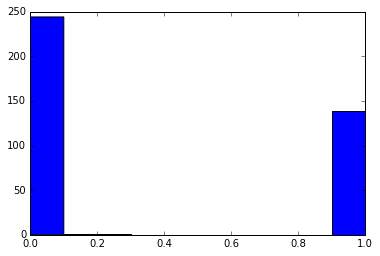

In [35]:
plt.hist(top_output[:,0])

In [72]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [73]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

In [74]:
cl

array([ 1.,  4.,  1.,  1.,  1.,  4.,  4.,  1.,  2.,  4.,  1.,  1.,  3.,
        1.,  1.,  1.,  4.,  1.,  3.,  1.,  2.,  1.,  1.,  4.,  1.,  4.,
        2.,  1.,  1.,  1.,  0.,  2.,  4.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  2.,  1.,
        4.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  2.,  1.,  4.,  4.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  4.,  4.,  3.,
        1.,  1.,  1.,  1.,  2.,  1.,  4.,  1.,  4.,  1.,  4.,  1.,  4.,
        1.,  1.,  4.,  4.,  0.,  4.,  4.,  1.,  1.,  1.,  1.,  3.,  3.,
        1.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  4.,  4.,  3.,
        1.,  2.,  1.,  1.,  1.,  3.,  4.,  1.,  4.,  1.,  1.,  3.,  4.,
        4.,  1.,  1.,  1.,  0.,  1.,  4.,  1.,  4.,  3.,  1.,  1.,  2.,
        4.,  4.,  1.,  3.,  1.,  4.,  1.,  1.,  1.,  4.,  1.,  4.,  1.,
        2.,  1.,  1.,  4.,  1.,  4.,  1.,  1.,  4.,  2.,  3.,  4.,  1.,
        4.,  1.,  1.,  4.,  1.,  4.,  4.,  0.,  1.,  1.,  1.,  1

([<matplotlib.axis.XTick at 0x12cb1f4d0>,
 <a list of 5 Text xticklabel objects>)

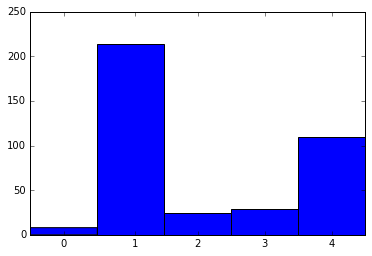

In [102]:
plt.hist(cl,bins=5)
plt.xticks((0.4,1.25,2.0,2.8,3.6),('0','1','2','3','4'))

Check Survival curves for the different classes
===============================================

In [76]:
import csv
id=[]
with open('../data/'+datafiles['mRNA']) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [77]:
stat={}
with open('../data/TCGA_Data/data_bcr_clinical_data_patient.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        patient_id=row[1]
        stat[patient_id]=(row[15],row[16],row[17])

In [78]:
import re
time_list = []
event_list = []
group_list = []
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\d+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(1)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(0)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
TCGA-24-0981
No data for TCGA-04-1519
No data for TCGA-04-1360
TCGA-01-0639
TCGA-01-0642
No data for TCGA-04-1357
TCGA-01-0628
TCGA-04-1331
TCGA-01-0636
TCGA-01-0633
TCGA-01-0637
TCGA-01-0631
TCGA-01-0630


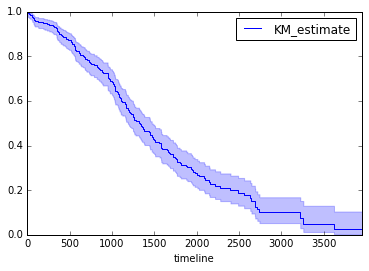

In [79]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

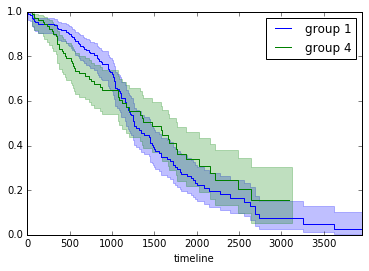

In [81]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 1)
kmf.fit(T[ix], E[ix], label='group 1')
ax=kmf.plot()
for i in [4]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)

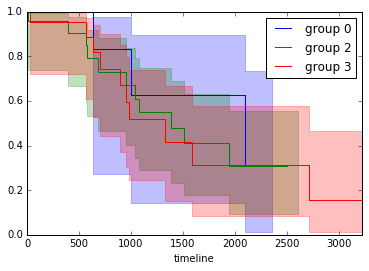

In [82]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in range(2,4):
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)

# Comparison with MATLAB results

In [83]:
with open('/Users/gluca/SoftwareProjects/Thesis/MDBN/MATLAB_classes.txt') as f:
    matlab_classes = f.readlines()
ML = []
for s in matlab_classes:
    ML.append(float(s))
ML = np.asarray(ML)

The class ids obtained from MATLAB and from Theano are not the same, the formula below happens to convert them

In [86]:
new_cl = np.mod(ML+3,5)

In [87]:
new_cl

array([ 1.,  4.,  1.,  1.,  1.,  4.,  4.,  1.,  1.,  4.,  1.,  1.,  4.,
        1.,  1.,  0.,  4.,  1.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  4.,
        4.,  1.,  1.,  1.,  4.,  4.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,
        1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,
        4.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1.,  4.,  4.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  4.,  4.,  4.,  4.,
        1.,  1.,  1.,  1.,  4.,  1.,  4.,  1.,  4.,  1.,  4.,  1.,  4.,
        1.,  1.,  4.,  4.,  4.,  4.,  4.,  1.,  1.,  1.,  1.,  4.,  4.,
        1.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  4.,  4.,  4.,
        1.,  1.,  1.,  1.,  1.,  4.,  4.,  1.,  4.,  1.,  1.,  4.,  4.,
        4.,  1.,  1.,  1.,  4.,  1.,  4.,  1.,  4.,  4.,  1.,  1.,  1.,
        4.,  4.,  1.,  4.,  1.,  4.,  1.,  1.,  1.,  4.,  1.,  4.,  1.,
        1.,  1.,  1.,  4.,  1.,  4.,  1.,  1.,  4.,  1.,  4.,  4.,  1.,
        4.,  1.,  1.,  4.,  1.,  4.,  4.,  4.,  1.,  1.,  1.,  1

(array([   3.,  226.,    0.,    0.,  156.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 5 Patch objects>)

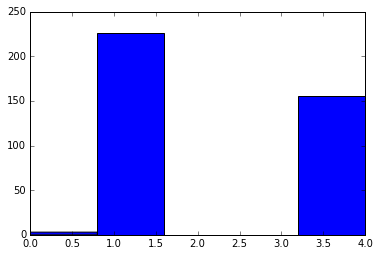

In [88]:
plt.hist(new_cl,bins=5)

Number of samples with the same class

In [89]:
np.sum(new_cl == cl)

319

In [90]:
319./385.

0.8285714285714286